In [1]:
from skimage import data
from skimage import color
from skimage.filters import gaussian, sobel
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
from skimage.feature import canny, corner_harris, corner_subpix, corner_peaks
from skimage.restoration import denoise_tv_chambolle
from skimage.transform import rescale, rotate
from skimage.filters import threshold_otsu
from skimage import measure
from skimage import exposure
import cv2 as cv
%matplotlib inline

In [4]:
coin = plt.imread('../Pictures/coin2.jpg')
cat = plt.imread('../Pictures/cat1.jpg')
tesla = plt.imread('../Pictures/tesla.jpg')
noisy = plt.imread('../Pictures/noisy7.jpg')
chaplin = plt.imread('../Pictures/chaplin.png')
apple = plt.imread('../Pictures/apple.jpg')
car = plt.imread('../Pictures/Tesla_car.jpg')
rotated = plt.imread('../Pictures/rotated.png')
building = plt.imread('../Pictures/building.jpg')
april = plt.imread('../Pictures/april.jpg')

In [7]:
len(color.rgb2gray(coin).shape)

2

# RGB Image Layers & Histograms

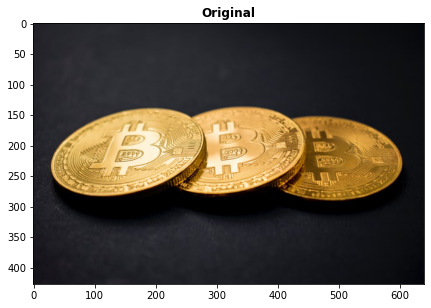

In [47]:
plt.figure(figsize=(7,6))
plt.imshow(coin);
plt.title('Original', fontweight="bold");

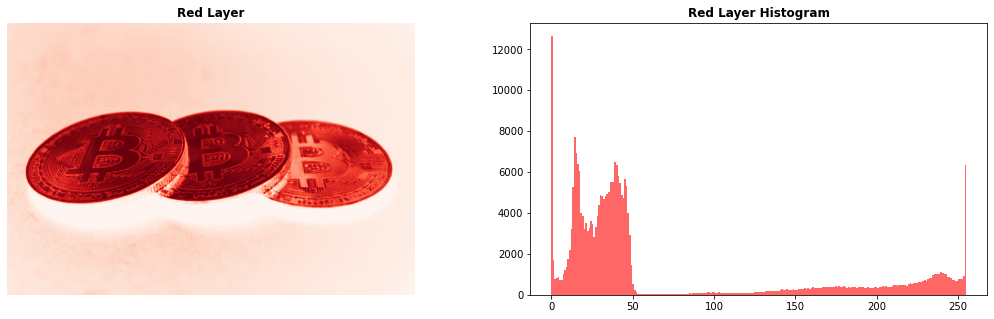

In [48]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(coin[:,:,0], cmap='Reds');
plt.title('Red Layer', fontweight="bold")
plt.axis('off')


plt.subplot(1,2,2)
plt.hist(coin[:,:,0].ravel(), bins=256, alpha=0.6, color='r');
plt.title('Red Layer Histogram', fontweight="bold");

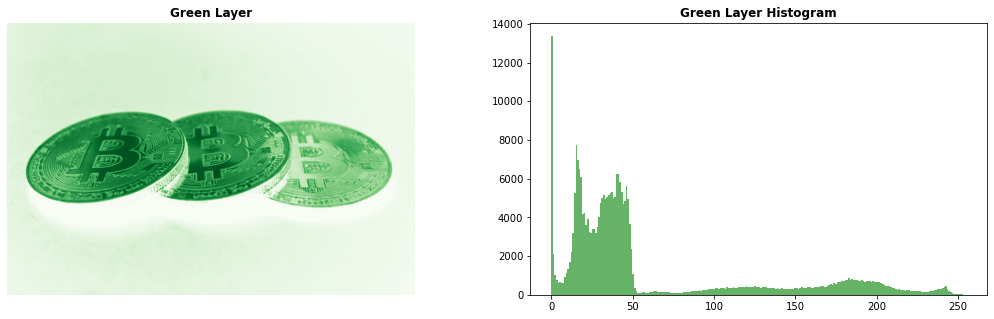

In [49]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(coin[:,:,1], cmap='Greens');
plt.title('Green Layer', fontweight="bold")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(coin[:,:,1].ravel(),bins=256, alpha=0.6, color='g');
plt.title('Green Layer Histogram', fontweight="bold");

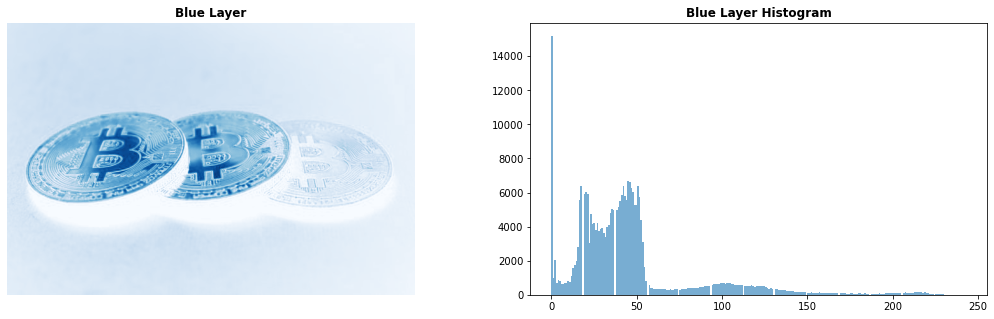

In [50]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(coin[:,:,2], cmap='Blues');
plt.title('Blue Layer', fontweight="bold")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(coin[:,:,2].ravel(),bins=256, alpha=0.6);
plt.title('Blue Layer Histogram', fontweight="bold");

# Threesholding

- ## Coin

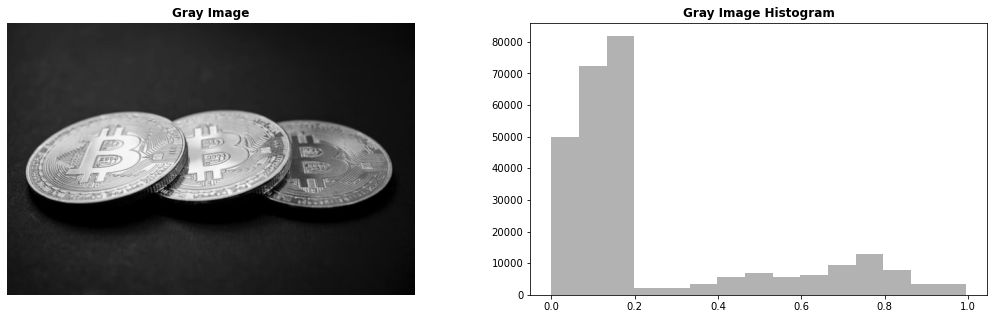

In [51]:
coin_gray = color.rgb2gray(coin)
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(coin_gray, cmap='gray')
plt.title('Gray Image', fontweight="bold");
plt.axis('off');

plt.subplot(1,2,2)
plt.hist(coin_gray[:,:].ravel(), bins=15, alpha=0.6, color='gray');
plt.title('Gray Image Histogram', fontweight="bold");

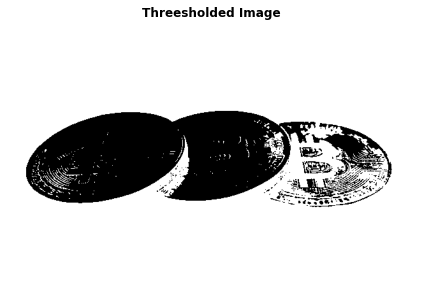

In [52]:
thresh = 0.5
coin_gray = color.rgb2gray(coin)
coin_gray = coin_gray <= thresh

plt.figure(figsize=(18,5))
plt.imshow(coin_gray, cmap='gray');
plt.title('Threesholded Image', fontweight="bold");
plt.axis('off');

- ## Nikola Tesla

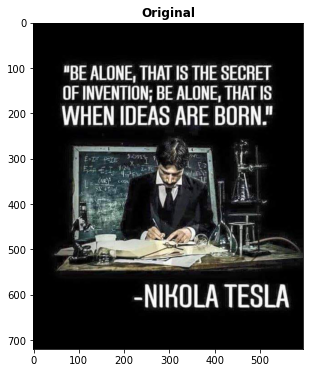

In [53]:
plt.figure(figsize=(7,6))
plt.imshow(tesla);
plt.title('Original', fontweight="bold");

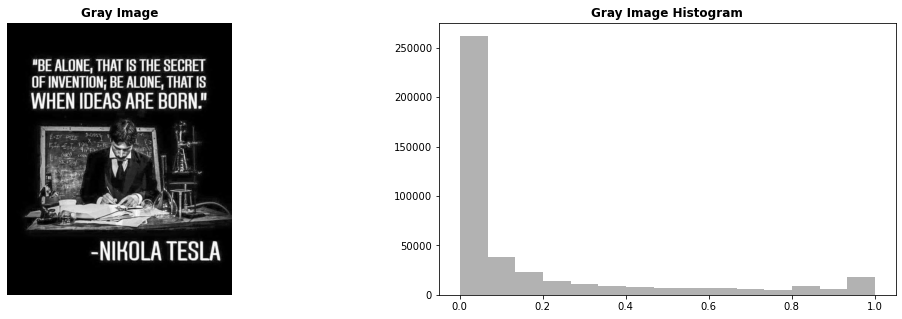

In [54]:
gray_tesla = color.rgb2gray(tesla)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(gray_tesla, cmap='gray');
plt.title('Gray Image', fontweight="bold");
plt.axis('off');

plt.subplot(1,2,2)
plt.hist(gray_tesla[:,:].ravel(), bins=15, alpha=0.6, color='gray');
plt.title('Gray Image Histogram', fontweight="bold");

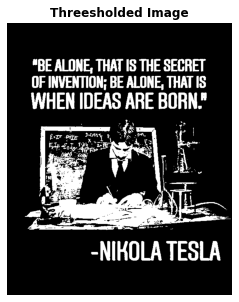

In [55]:
thresh = 0.3
tesla_gray = color.rgb2gray(tesla)
tesla_gray = tesla_gray >= thresh

plt.figure(figsize=(18,5))
plt.imshow(tesla_gray, cmap='gray');
plt.title('Threesholded Image', fontweight="bold");
plt.axis('off');

# Gaussian Smoothing

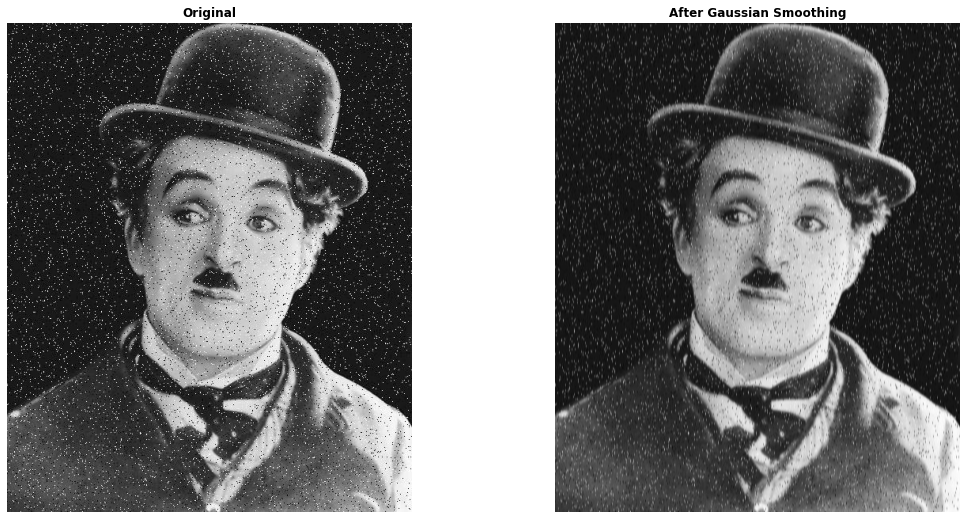

In [56]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(chaplin, cmap='gray')
plt.title('Original', fontweight="bold")
plt.axis('off');

plt.subplot(1,2,2)
plt.title('After Gaussian Smoothing', fontweight="bold");
plt.imshow(gaussian(chaplin, sigma=1.3, multichannel=True), cmap='gray');
plt.axis('off');

# Sobel & Canny Edge Detection

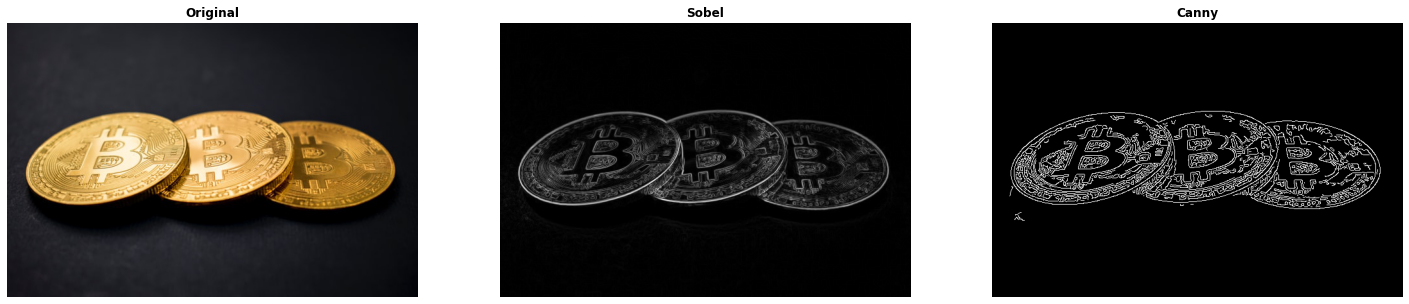

In [57]:
plt.figure(figsize=(25,25))
plt.subplot(1,3,1)
plt.imshow(coin);
plt.title('Original', fontweight="bold")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobel(color.rgb2gray(coin)), cmap='gray');
plt.axis('off');
plt.title('Sobel', fontweight="bold");

plt.subplot(1,3,3)
plt.imshow(canny(color.rgb2gray(coin)), cmap='gray');
plt.axis('off');
plt.title('Canny', fontweight="bold");

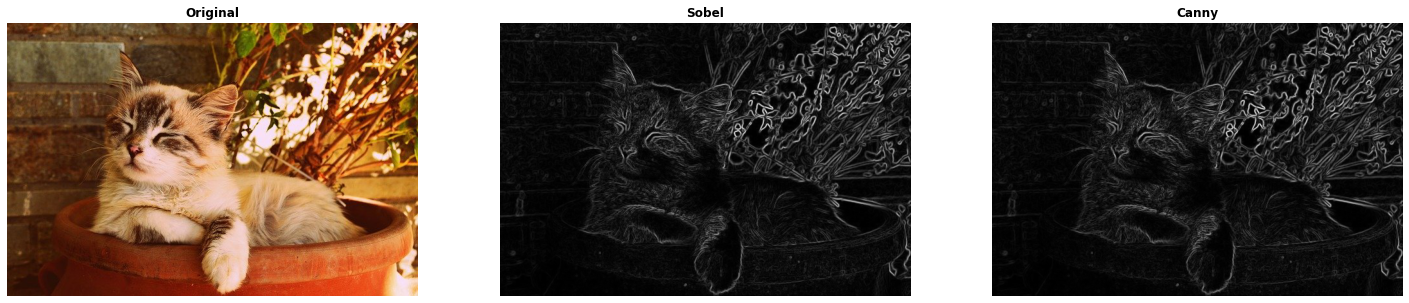

In [58]:
plt.figure(figsize=(25,25))
plt.subplot(1,3,1)
plt.imshow(cat);
plt.axis('off')
plt.title('Original', fontweight="bold")

plt.subplot(1,3,2)
plt.imshow(sobel(color.rgb2gray(cat)), cmap='gray');
plt.axis('off');
plt.title('Sobel', fontweight="bold");

plt.subplot(1,3,3)
plt.imshow(sobel(color.rgb2gray(cat)), cmap='gray');
plt.axis('off');
plt.title('Canny', fontweight="bold");

# Histogram Equalization

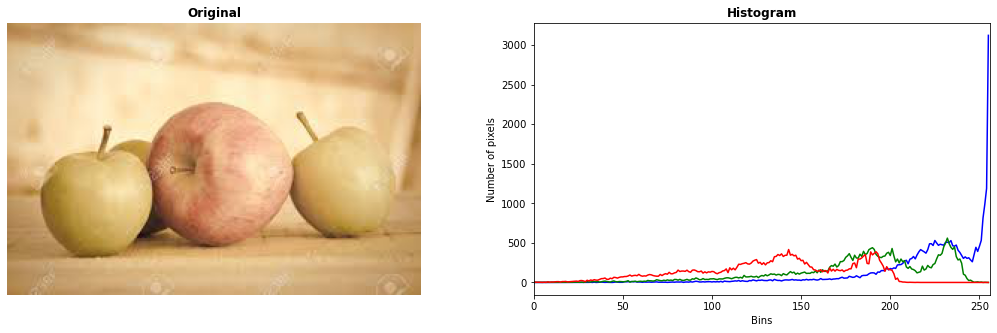

In [59]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.imshow(apple);
plt.title('Original', fontweight="bold");
plt.axis('off');

plt.subplot(1,2,2)
img = apple.copy()
blank = np.zeros(img.shape[:2], dtype='uint8')
mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)
plt.title('Histogram', fontweight="bold")
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

E:\Anaconda_Setup\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


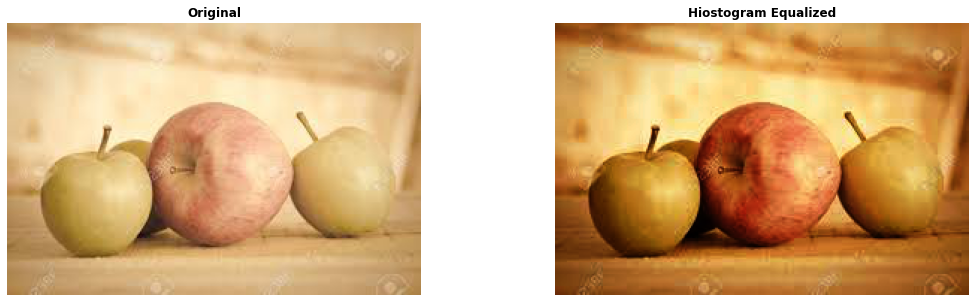

In [60]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.imshow(apple);
plt.title('Original', fontweight="bold")
plt.axis('off');

apple_equal = exposure.equalize_hist(apple)
plt.subplot(1,2,2)
plt.title('Hiostogram Equalized', fontweight="bold");
plt.imshow(apple_equal);
plt.axis('off');

# Rotation

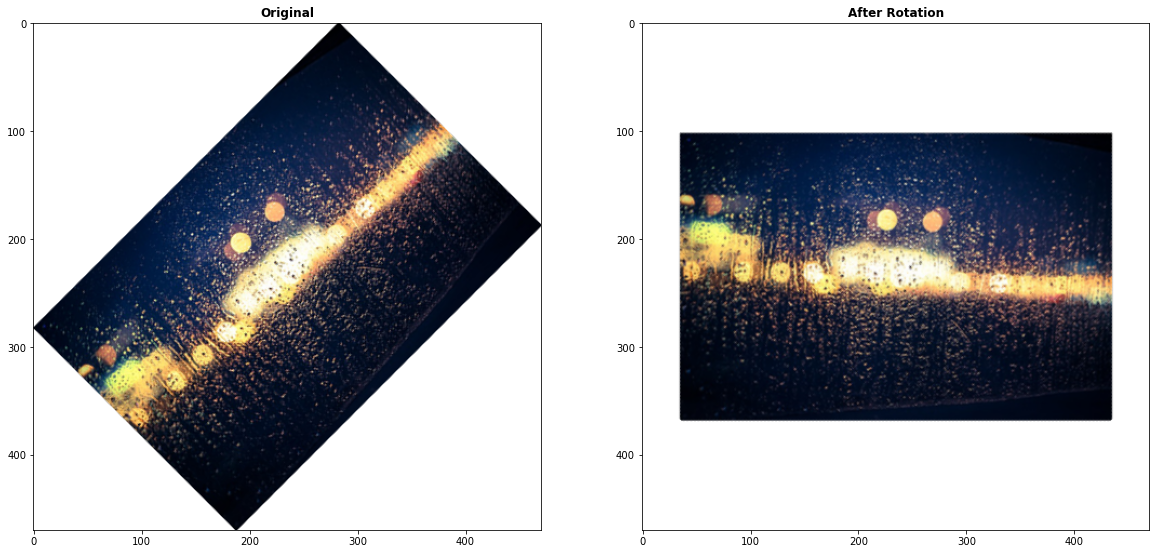

In [61]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(rotated);
plt.title('Original', fontweight="bold")

plt.subplot(1,2,2)
plt.title('After Rotation', fontweight="bold");
plt.imshow(rotate(rotated, -45));

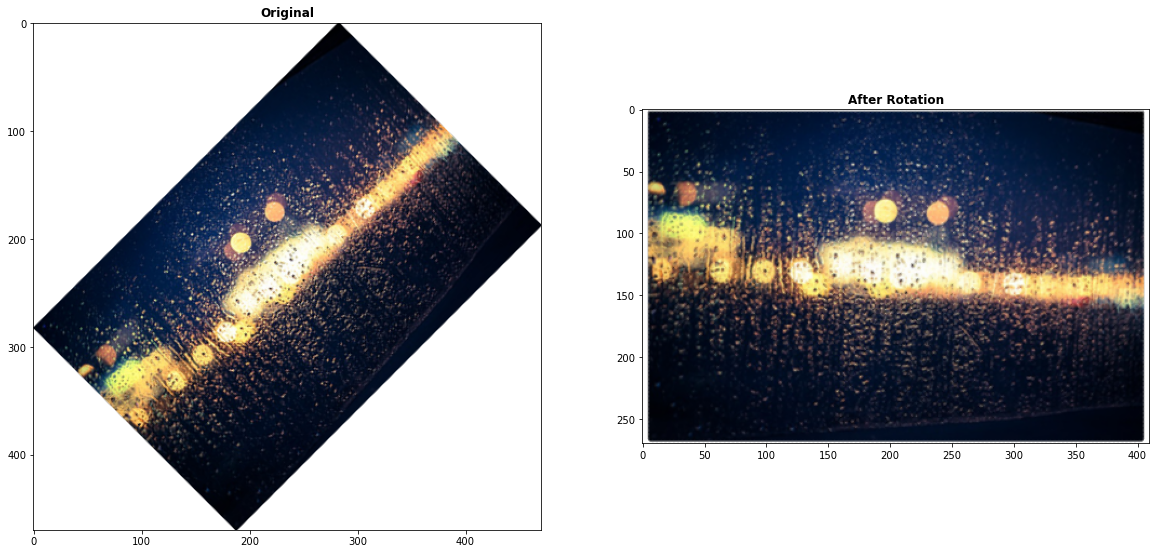

In [62]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(rotated);
plt.title('Original', fontweight="bold")

after_rotation = rotate(rotated, -45)[100:370,30:440,:]
plt.subplot(1,2,2)
plt.title('After Rotation', fontweight="bold");
plt.imshow(after_rotation);

# Resizing

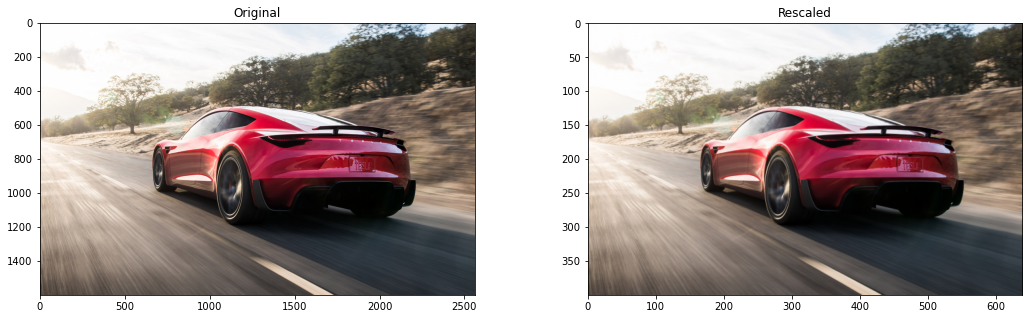

In [63]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.imshow(car);
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rescale(car, 1/4, multichannel=True, anti_aliasing=True));
plt.title('Rescaled');

# Contours

In [64]:
contours = color.rgb2gray(april)
thresh = threshold_otsu(contours)
contours = contours > thresh

contours = measure.find_contours(contours, 0.8)

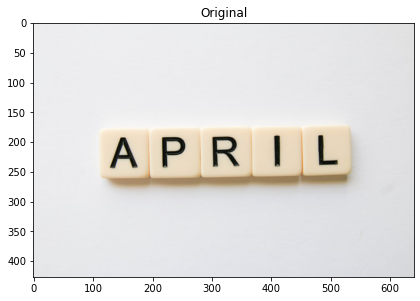

In [65]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(april);
plt.title('Original');

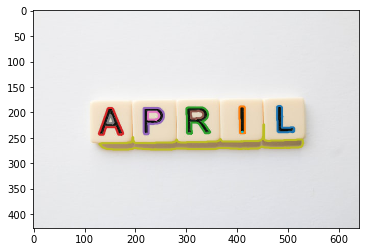

In [66]:
fig, ax = plt.subplots()
ax.imshow(april, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)

# Denosing

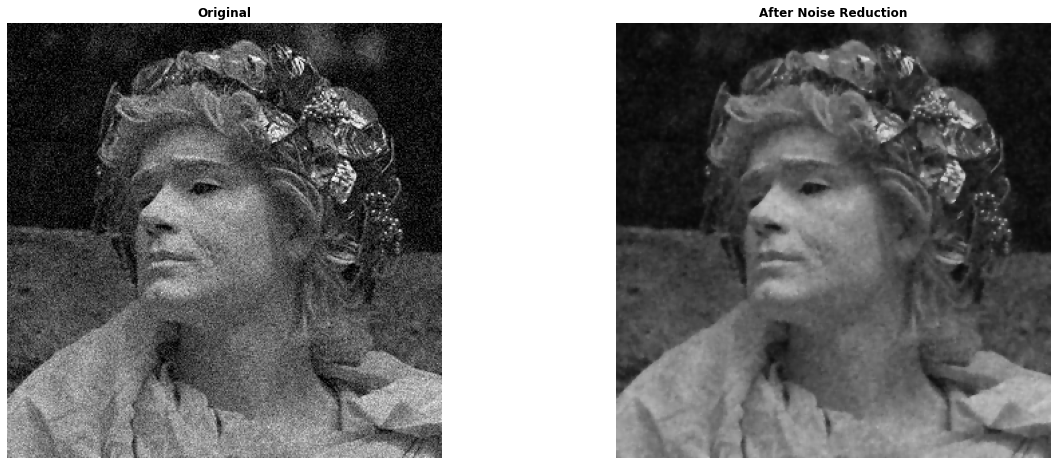

In [67]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(noisy)
plt.title('Original', fontweight="bold")
plt.axis('off');

plt.subplot(1,2,2)
plt.title('After Noise Reduction', fontweight="bold");
plt.imshow(denoise_tv_chambolle(noisy));
plt.axis('off');

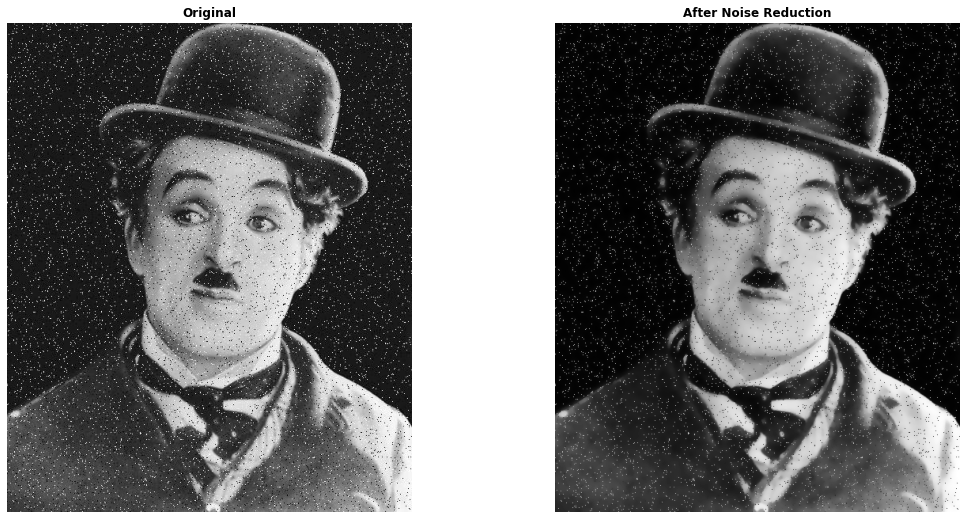

In [68]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(chaplin, cmap='gray')
plt.title('Original', fontweight="bold")
plt.axis('off');

plt.subplot(1,2,2)
plt.title('After Noise Reduction', fontweight="bold");
plt.imshow(denoise_tv_chambolle(chaplin), cmap='gray');
plt.axis('off');